In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Calculate Balaced Accuracy by HumanEnsemble

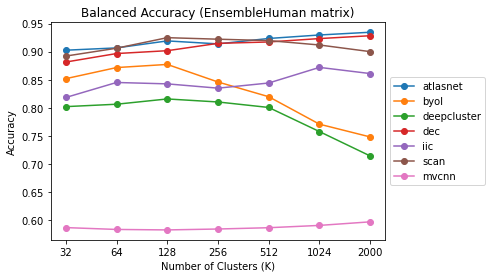

In [5]:
cluster_k = ['32', '64', '128', '256', '512', '1024', '2000']
methods = ['atlasnet', 'byol', 'deepcluster', 'dec', 'iic', 'scan', 'mvcnn']

t = np.array([1, 2, 3, 4, 5, 6, 7])
fig, ax = plt.subplots()

for method in methods:
    data = []
    for k in cluster_k:
        ensemble_mat = np.load('./confusion_matrix_ensemble/confusion_matrix_' + method + '_' + k + '.npy')
        human_mat = np.load('./confusion_matrix_humanensemble/confusion_matrix_' + method + '_' + k + '.npy')
        
        # Balanced accuracy for ensemble
        sensitive = ensemble_mat[0][0] / (ensemble_mat[0][0] + ensemble_mat[1][0])
        specify = ensemble_mat[1][1] / (ensemble_mat[0][1] + ensemble_mat[1][1])
        ensemble_balance = (sensitive + specify)/2
        
        # Balanced accuracy for human
        sensitive = human_mat[0][0] / (human_mat[0][0] + human_mat[1][0])
        specify = human_mat[1][1] / (human_mat[0][1] + human_mat[1][1])
        human_balance = (sensitive + specify)/2

        data.append((ensemble_balance+human_balance)/2)
    ax.plot(t, data, marker='o', label=method)

ax.set(xlabel='Number of Clusters (K)', ylabel='Accuracy', title='Balanced Accuracy (EnsembleHuman matrix)')
ll = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
my_xticks = ['32', '64', '128', '256', '512', '1024', '2000']
plt.xticks(t, my_xticks)
    
plt.show()